# Исследование продаж компьютерных игр.
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Файл с данными и  общая информация. 

In [1]:
import pandas as pd # импортируем необходимые бтблиотеки
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st


In [2]:
data = pd.read_csv('/datasets/games.csv')
pd.set_option('display.max_rows', 50) # увеличим максимум отображаемых строк
pd.set_option('display.max_colwidth', 50) # и столбцов

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


- Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры\
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.\
Данные за 2016 год могут быть неполными.

In [4]:
data.shape

(16715, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
data.isna().sum()/len(data)*100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [8]:
data.duplicated().sum() # дубликатов нет

0

In [9]:
old_shape = data.shape

Сразу видим проблемные столбцы 'Name' и 'Genre' всего несколько, а вот в 'Year_of_Release' уже 269 пропущенных значений. С оценками критиков, пользователей и рейтингом ситуция еще хуже. Кроме пропусков видим неверные форматы данных в 'Year_of_Release'(думаю перевести в инт, т.к. имеем только год выхода) и снова наши оценки в разных форматах, нужно рассмотретть детальнее и привести к одному виду.  

## Подготовка данных

### Замена названий столбцов

Приведем все наименования к общему, красивому виду

In [10]:
data.columns = data.columns.str.lower()# приведем все названия к snake_case

In [11]:
list(data)

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

### Изменение типов данных и удаление пропусков

**year_of_release**\
Начнем с года выпуска, прежде чем изменить тип данных, необходимо избавиться от пропусков.

In [12]:
data['year_of_release'].isna().sum()

269

Заполнять пропуски будем на основе платформы для которой была выпущена игра, так как игры выпускаются в интервале от выпуска платформы до выхода нового поколения. Использовать будем среднее значение, так как смещение среднего значения будет в сторону года, в котором выпустили больше игрб что по моему мнению даст большую точность.

In [13]:
data['year_of_release'] = data\
                .groupby('platform')['year_of_release']\
                .transform(lambda col: col.fillna(col.mean().round(0)))

In [14]:
data['year_of_release'].isna().sum()

0

Изменим тип данных на целочисленный

In [15]:
data['year_of_release'] = data['year_of_release'].astype(int)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


**critic_score & user_score**
Посмотрим на наши оценки. Больше половины значений пустые, чтобы не исказить метрики заменим пустые значения на -1 и не буддем их учитывать при подсчете средних значений.

In [17]:
data['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Половина непустых значений в диапазоне от 60 до 79. Минимальное значение 13 - так что наши -1 будут явной аномалией.

In [18]:
data['critic_score'] = data['critic_score'].fillna(-1)

In [19]:
data['critic_score'] = data['critic_score'].astype(int)

In [20]:
data['critic_score'][data['critic_score'] >= 0].describe() # так можно откинуть -1 значения

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

<AxesSubplot:>

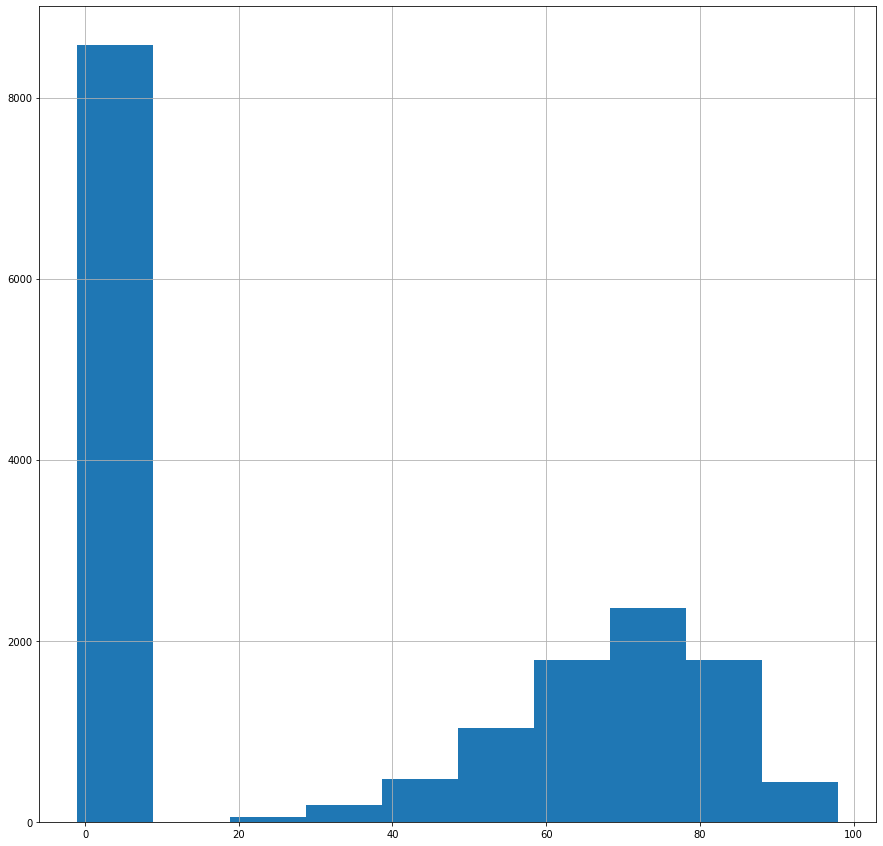

In [21]:
data['critic_score'].hist(figsize=(15, 15))

В 'user_score' ситуация похожа, однако кроме пустых значений, есть некий 'tbd'. Согласно [Cambridge Dictionary](https://dictionary.cambridge.org/ru/%D1%81%D0%BB%D0%BE%D0%B2%D0%B0%D1%80%D1%8C/%D0%B0%D0%BD%D0%B3%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9/tbd) - это отложенная оценка, т.е. пользователь пока не определился с оценкой продукта. Предлагаю заменить эти значения на 0 и признать это значение отсутствием оценки.

In [22]:
data[data['user_score'] == '0'] # '0' так как тип данных в столбце object


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,-1,0,E


Всего 1 нулевая оценка и критики игру не оценивали, так что действуем.

In [23]:
data['user_score'] = data['user_score'].fillna(-1)

In [24]:
data.loc[data['user_score'] == 'tbd','user_score'] = 0

Изменим тип данных на float.

In [25]:
# Перевод к числовому формату
data['user_score'] = data['user_score'].astype('float') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


<AxesSubplot:>

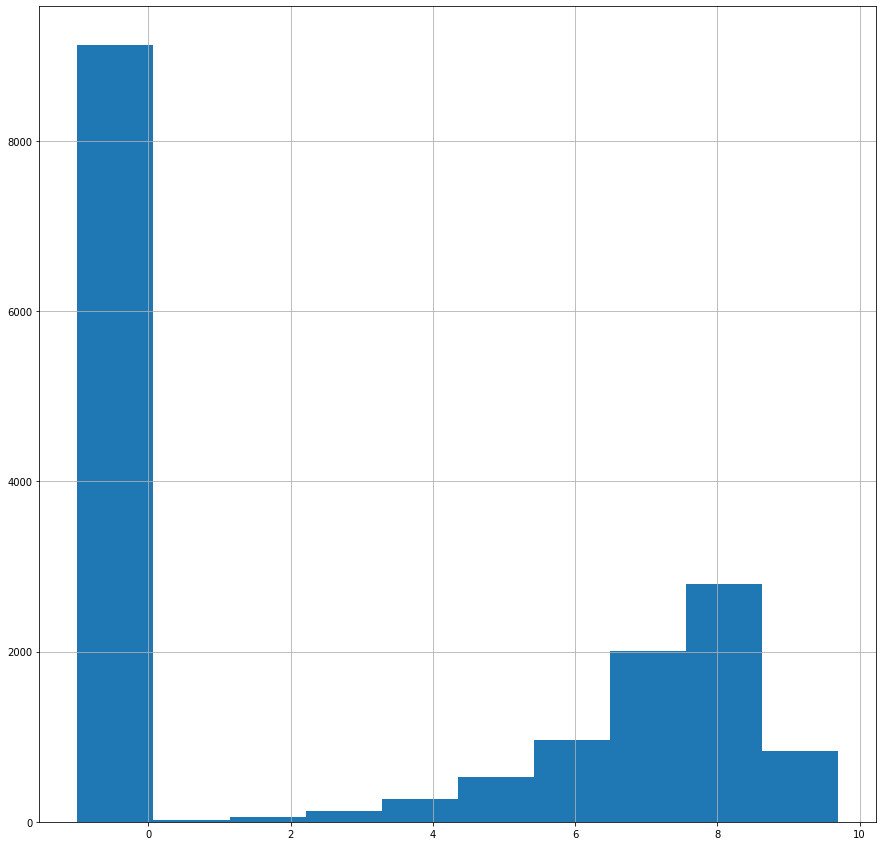

In [26]:
data['user_score'].hist(figsize=(15, 15)) # график расппределения

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


**name & genre**

In [28]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1,-1.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1,-1.0,NaN


In [29]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1,-1.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1,-1.0,NaN


In [30]:
data[data['platform'] == 'GEN']['platform'].count() # можем потерять 2 значения из 29

29

2 пропущенных значения в столбцах совпадает, не вижу способа заполнить недостающиие данные, потому предлагаю переименовать.

In [31]:
data['name'] = data['name'].fillna('no_name') 
data['genre'] = data['genre'].fillna('no_genre')

**rating** Последний столбец с пропусками. Отсутствующие значения возможно говорят о том, что игра не получала оценку от [ESRB](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board), Имеет ли игра рейтинг европейский [PEGI](https://ru.wikipedia.org/wiki/Pan_European_Game_Information) или японский [CERO](https://ru.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization), нам не известно - заменим пропуски на unknown.

In [32]:
data['rating'] = data['rating'].fillna('unknown')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


### Добавление признаков

Имея 4 столбца с количеством проданных копий, было бы логично посчитать их суммарное значение.

In [34]:
# сложим значения в столбцах с индесом 4, 5, 6 и 7, сумму поместим столбец с индексом 8
data['total_sales'] = data.iloc[:, 4:8].sum(axis=1) 

In [35]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,unknown,0.01


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


Итог подготовительного этапа:
- привели названия столбцов к змеиному регистру
- **year_of_release** заполнили средним значением по платформе, для которой выпускалась игра
- **critic_score** заменили пустые значения на 0
- **user_score** заменили пустые значения на 0, а аббревиатуру 'tbd' заменили нна -1
- удалили 2 строки с пропусками в **name** и **genre**
- **rating** заменили пропуски значеним 'unknown'
- добавили столбец с суммарным значением проданных копий **total_sales**


После проделанных процедур имеем датафрейм готовый к дальнейшим исследованиям.

## EDA

### Определенияе актуального периода

array([[<AxesSubplot:title={'center':'year_of_release'}>,
        <AxesSubplot:title={'center':'na_sales'}>,
        <AxesSubplot:title={'center':'eu_sales'}>],
       [<AxesSubplot:title={'center':'jp_sales'}>,
        <AxesSubplot:title={'center':'other_sales'}>,
        <AxesSubplot:title={'center':'critic_score'}>],
       [<AxesSubplot:title={'center':'user_score'}>,
        <AxesSubplot:title={'center':'total_sales'}>, <AxesSubplot:>]],
      dtype=object)

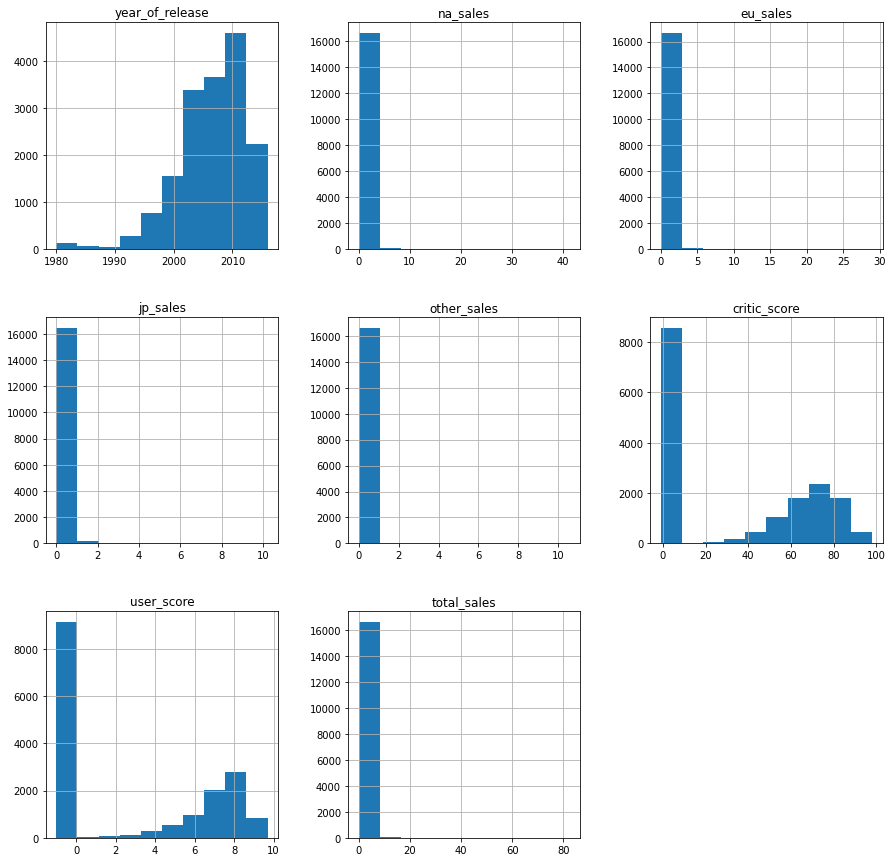

In [37]:
data.hist(figsize=(15, 15), bins=10) #  гистограммы числовых стобцов

In [38]:
year_stat = data.pivot_table(index='year_of_release', 
                                   values='name', 
                                   aggfunc=['count'])
year_stat.reset_index(inplace=True)
year_stat.columns = ['год', 'кол-во']
year_stat

,год,кол-во
0,1980,9
1,1981,46
2,1982,53
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


,count,mean,std,min,25%,50%,75%,max
year_of_release,16715.0,2006.47227,5.897158,1980.0,2003.0,2007.0,2010.0,2016.0


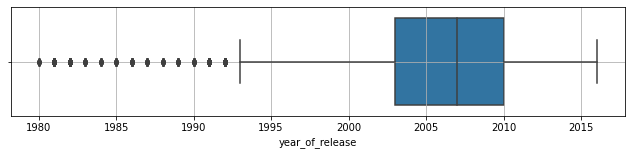

In [39]:
plt.figure(figsize=(11, 2))
sns.boxplot(x=data['year_of_release'])
plt.grid();
data[['year_of_release']].describe().T

До 1994 года игр выпускалось сравнительно мало и график показывает нам, что эти данные можно считать выбросами.

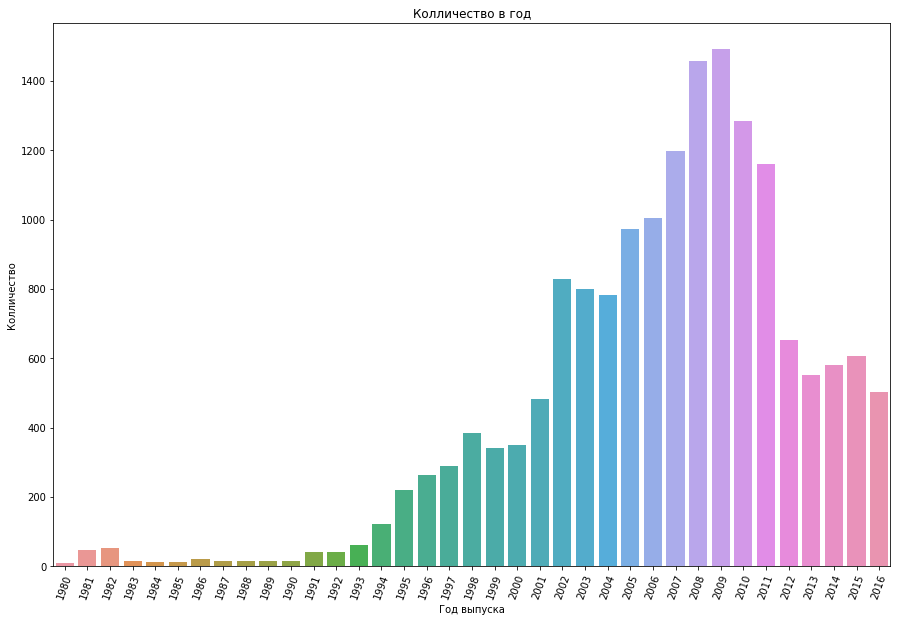

In [40]:
all_time = data.pivot_table(index='year_of_release', values='name', aggfunc='count') # сводная таблица
plt.figure(figsize=(15,10))
sns.barplot(x=all_time.index, y="name", data=all_time)
plt.title('Колличество в год')
plt.xlabel('Год выпуска')
plt.ylabel('Колличество')
plt.xticks(rotation=70)
plt.show()

In [41]:
unique_games = data[data['name'].duplicated() == False] # оставим игры с уникальным названием
unique_games.shape

(11560, 12)

In [42]:
all_time_unique = unique_games.pivot_table(index='year_of_release', values='name', aggfunc='count')
all_time_unique

,name
year_of_release,
1980,8
1981,43
1982,50
1983,16
1984,13
1985,13
1986,21
1987,15
1988,11


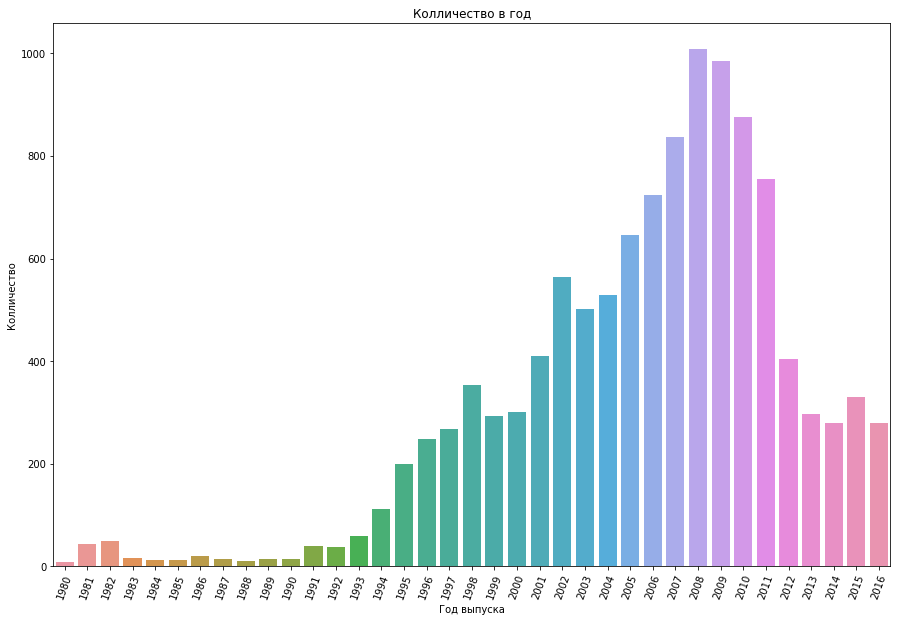

In [43]:
plt.figure(figsize=(15,10))
sns.barplot(x=all_time_unique.index, y="name", data=all_time_unique)
plt.title('Колличество в год')
plt.xlabel('Год выпуска')
plt.ylabel('Колличество')
plt.xticks(rotation=70)
plt.show()

Посмотрим, как менялись продажи по платформам

In [44]:
top_pl = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

top_pl.reset_index(inplace=True)
top_pl.columns = ['platform', 'total_sales']
top_10 = top_pl.iloc[0:10]
top_10

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Все поколения PlayStation в топе по количеству проданных копий, консоли производства Microsoft и Nintendo - тоже в списке лиднров.

In [45]:
data_top = data[data['platform'].isin(list(top_10['platform']))]

In [46]:
top_platform_years = data_top.pivot_table(index='year_of_release',
                                    columns='platform',
                                    values='total_sales', 
                                    aggfunc=['sum'],
                                    fill_value=0)                        
top_platform_years

sum                                                       \
platform             DS    GBA     PC      PS     PS2     PS3     PS4    PSP   
year_of_release                                                                
1985               0.02   0.00   0.04    0.00    0.00    0.00    0.00   0.00   
1988               0.00   0.00   0.03    0.00    0.00    0.00    0.00   0.00   
1992               0.00   0.00   3.03    0.00    0.00    0.00    0.00   0.00   
1994               0.00   0.00  12.87    6.03    0.00    0.00    0.00   0.00   
1995               0.00   0.00   4.22   35.96    0.00    0.00    0.00   0.00   
1996               0.00   0.00  10.58   94.70    0.00    0.00    0.00   0.00   
1997               0.00   0.00  11.27  136.17    0.00    0.00    0.00   0.00   
1998               0.00   0.00   3.26  172.77    0.00    0.00    0.00   0.00   
1999               0.00   0.00   4.74  144.53    0.00    0.00    0.00   0.00   
2000               0.00   0.07   4.66   96.37   39.17    0.00    0.00   0.00   
2001               0.00  61.53   5.47   35.59  166.43    0.00    0.00   0.00   
2002               0.00  74.16   8.57    6.67  205.38    0.00    0.00   0.00   
2003               0.00  61.64   8.84    2.07  184.31    0.00    0.00   0.00   
2004              17.27  77.91  10.39    0.00  211.81    0.00    0.00   7.06   
2005             130.14  33.86   4.37    0.00  182.87    0.00    0.00  43.84   
2006             119.81   5.28   2.85    0.00  103.42   20.96    0.00  55.32   
2007             146.94   3.40   9.28    0.00   75.99   73.19    0.00  46.93   
2008             148.65   0.00  12.42    0.00   53.90  118.52    0.00  34.55   
2009             119.54   0.00  20.67    0.00   26.40  130.93    0.00  42.30   
2010              85.02   0.00  24.28    0.00    5.64  142.17    0.00  35.04   
2011              26.18   0.00  35.03    0.00    0.45  165.09    0.00  17.82   
2012              11.01   0.00  23.22    0.00    0.00  107.36    0.00   7.69   
2013               1.54   0.00  12.38    0.00    0.00  113.25   25.99   3.14   
2014               0.00   0.00  13.28    0.00    0.00   47.76  100.00   0.24   
2015               0.00   0.00   8.52    0.00    0.00   16.82  118.90   0.12   
2016               0.00   0.00   5.25    0.00    0.00    3.60   69.25   0.00   

                                 
platform            Wii    X360  
year_of_release                  
1985               0.00    0.00  
1988               0.00    0.00  
1992               0.00    0.00  
1994               0.00    0.00  
1995               0.00    0.00  
1996               0.00    0.00  
1997               0.00    0.00  
1998               0.00    0.00  
1999               0.00    0.00  
2000               0.00    0.00  
2001               0.00    0.00  
2002               0.00    0.00  
2003               0.00    0.00  
2004               0.00    0.00  
2005               0.00    8.25  
2006             137.15   51.62  
2007             152.77   95.41  
2008             171.32  135.26  
2009             223.30  120.29  
2010             127.95  180.21  
2011              59.65  143.84  
2012              21.71   99.74  
2013               8.59   88.58  
2014               3.75   34.74  
2015               1.14   11.96  
2016               0.18    1.52

In [47]:
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,-1.0,unknown,0.02


Первая запись по DS явно ошибочная, так как консоль вышла в 2004 году. Игра же под таким названием выпущена в 2010 [Strongest Tokyo University Shogi DS](https://www.vgchartz.com/game/4399/strongest-tokyo-university-shogi-ds/)

In [48]:
data.loc[15957, 'year_of_release'] = 2010

In [49]:
data.loc[15957]

name               Strongest Tokyo University Shogi DS
platform                                            DS
year_of_release                                   2010
genre                                           Action
na_sales                                           0.0
eu_sales                                           0.0
jp_sales                                          0.02
other_sales                                        0.0
critic_score                                        -1
user_score                                        -1.0
rating                                         unknown
total_sales                                       0.02
Name: 15957, dtype: object

In [50]:
data_top = data[data['platform'].isin(list(top_10['platform']))] # обновим топ

top_platform_years = data_top.pivot_table(index='year_of_release',
                                    columns='platform',
                                    values='total_sales', 
                                    aggfunc='sum',
                                    fill_value=0)                        
top_platform_years

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1992,0.00,0.00,3.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1994,0.00,0.00,12.87,6.03,0.00,0.00,0.00,0.00,0.00,0.00
1995,0.00,0.00,4.22,35.96,0.00,0.00,0.00,0.00,0.00,0.00
1996,0.00,0.00,10.58,94.70,0.00,0.00,0.00,0.00,0.00,0.00
1997,0.00,0.00,11.27,136.17,0.00,0.00,0.00,0.00,0.00,0.00
1998,0.00,0.00,3.26,172.77,0.00,0.00,0.00,0.00,0.00,0.00
1999,0.00,0.00,4.74,144.53,0.00,0.00,0.00,0.00,0.00,0.00


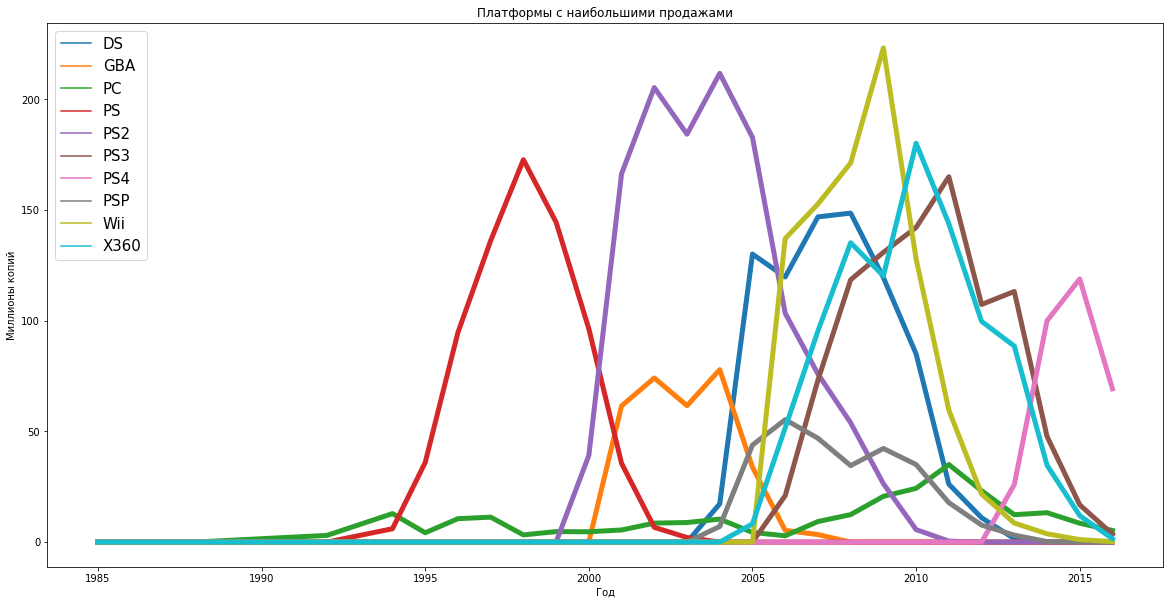

In [51]:
plt.figure(figsize=(20,10))
sns.lineplot(data = top_platform_years, linewidth = 5, dashes=False)
plt.title('Платформы с наибольшими продажами')
plt.xlabel('Год')
plt.ylabel('Миллионы копий')
plt.legend(loc='upper left', fontsize=15, bbox_to_anchor=(0, 1))
plt.show()

C 1995 по 2000 PS была можно сказать монополистом  среди консолей, после появилась конкуренция. Начиная с 2005 года явного лидера нет.

In [52]:
top_platform_life = data_top.pivot_table(index='platform',
                                    values='year_of_release', 
                                    aggfunc=['min', 'max'])                        
top_platform_life.reset_index(inplace=True)
top_platform_life.columns = ['platform', 'first', 'last']
top_platform_life['lifetime'] = top_platform_life['last'] - top_platform_life['first']
top_platform_life.sort_values(by='lifetime', ascending=False).head(10)

,platform,first,last,lifetime
2,PC,1985,2016,31
4,PS2,2000,2011,11
7,PSP,2004,2015,11
9,X360,2005,2016,11
5,PS3,2006,2016,10
8,Wii,2006,2016,10
0,DS,2004,2013,9
3,PS,1994,2003,9
1,GBA,2000,2007,7
6,PS4,2013,2016,3


Срок популярности консолей у игроделов, (даже самых успешных) на текущий момент не превышает 11 лет. Например PS2 - лидер по количеств3у проданных копий. Игры для этой консоли выпускались с 2000-2011гг. С портативной PS и XBox360  ситуация аналогичная, хотя у последней еще есть все шансы поставить новый рекорд среди игровых приставок. Персональный компьютер - вешь обновляемая, соответственно и игры для него выпускаются постоянно, тут нужно учеть популярность и актуальность игр выпущенных слишком давно.
Исходя из этого считаю атуальным периодом, для дальнейшего анализа, брать 11 лет, т.е. учитывать только игры выпущенные не раньше 2005г. Соответсвенно отбросится и аномальный период до 1994.

In [53]:
stat_data = data.loc[data['year_of_release'] >= 2005] # создадим отдельную переменную для дальнейшего анализа

In [54]:
new_shape = stat_data.shape
print(new_shape)
new_shape[0] / old_shape[0] *100 # размер актуальных данных

(11468, 12)


68.60903380197428

### Выбор потенциально прибыльных платформ

In [55]:
actual_top_10 = stat_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(10, 'total_sales')
actual_top_10 = list(actual_top_10.index)
actual_top_10 # выберем топ 10 в актуальном периоде

['X360', 'PS3', 'Wii', 'DS', 'PS2', 'PS4', 'PSP', '3DS', 'PC', 'XOne']

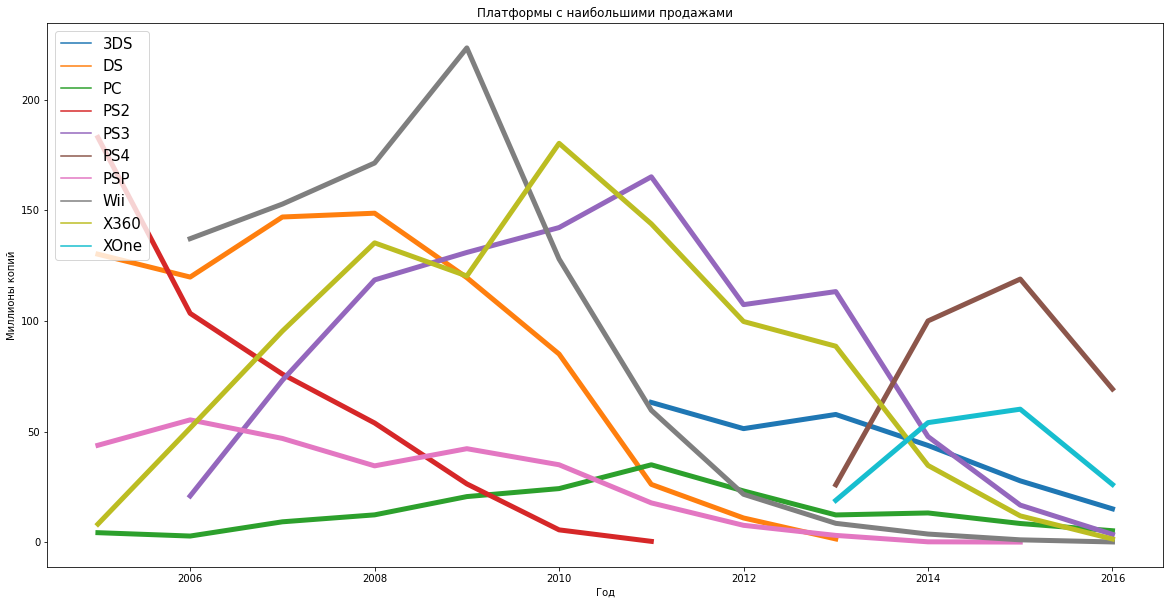

In [56]:
actual_platform_10 = stat_data[stat_data['platform'].isin(actual_top_10)] # все данные по топ 10
actual_platform = actual_platform_10.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
plt.figure(figsize=(20,10))
sns.lineplot(data = actual_platform, linewidth = 5, dashes=False)
plt.title('Платформы с наибольшими продажами')
plt.xlabel('Год')
plt.ylabel('Миллионы копий')
plt.legend(loc='upper left', fontsize=15, bbox_to_anchor=(0, 1))
plt.show()

На графике наблюдаем двух лидеров по продажам - PS4 b XBox One, не совсем растеряла свою популярность 3DS, ye b PC я бы не сбрасывал со счетов(хотя на ПК сейчас действительно редко покупают игры на физическом носителе)  для построения прогноза предлагаю ограничить данные годом выпуска консолей - 2013г т.к. в этом году вышли последние поколения консолей и начали набирать популярность. 3DS, X360 и PS3 еще достаточно популярны, но с выходоом новго поколеня их продажи начали резко падать. Остльные консоли уже в стадии увядания и хоть какой-то спрос поддерживают только ярые поклонники.


In [57]:
stat_data_last = stat_data[stat_data['year_of_release'] > 2012]

Text(-3.825000000000003, 0.5, 'платформа')

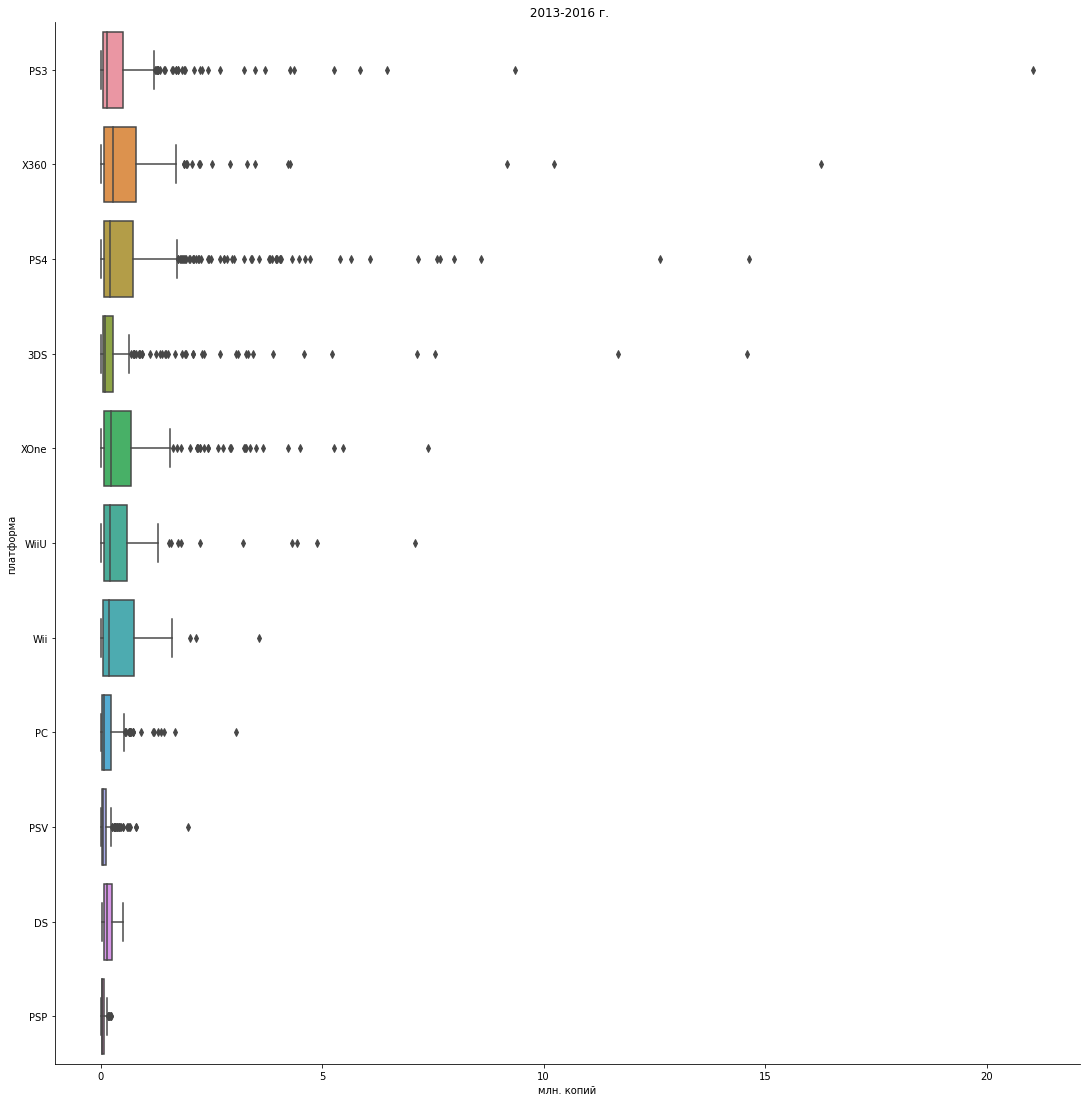

In [58]:
sns.catplot(x='total_sales', 
            y='platform', 
            kind='box', 
            data=stat_data_last, 
            orient='h',
            height=15)
plt.title(' 2013-2016 г.')
plt.xlabel('млн. копий')
plt.ylabel('платформа')

(0.0, 1.8)

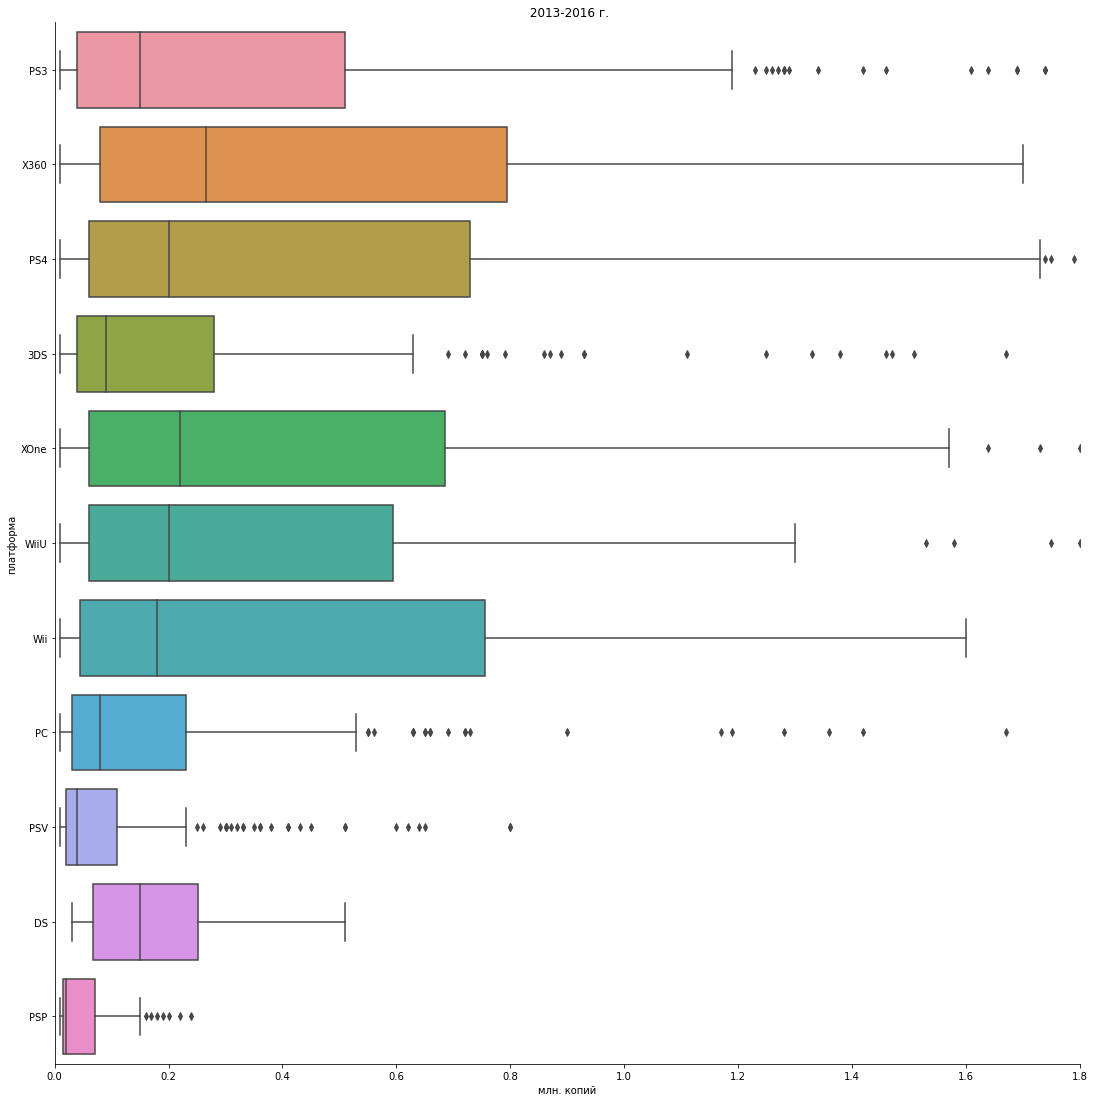

In [59]:
sns.catplot(x='total_sales', 
            y='platform', 
            kind='box', 
            data=stat_data_last, 
            orient='h',
            height=15)
plt.title(' 2013-2016 г.')
plt.xlabel('млн. копий')
plt.ylabel('платформа')
plt.xlim(0, 1.8)

В среднем количество продаж не превыжает 1млн. копий, за усами графика - хиты продаж.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Для анализа возьмем лидера по продажам в актуальном периоде - PS4

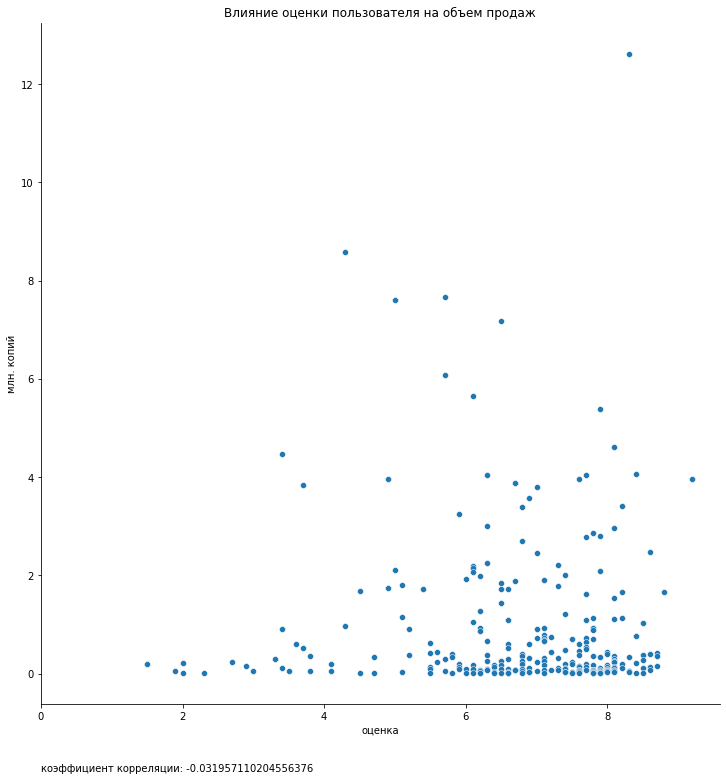

In [60]:
ps4 = stat_data_last[(stat_data_last['platform'] == 'PS4') & (stat_data_last['user_score'] > 0)]
ps4_corr_user = ps4['user_score'].corr(ps4['total_sales'])

sns.relplot(data=ps4, 
            x='user_score', 
            y='total_sales',
            height=10)
plt.title('Влияние оценки пользователя на объем продаж')
plt.xlabel('оценка')
plt.ylabel('млн. копий')
plt.xlim(0,)
plt.text(0, -2, f'коэффициент корреляции: {ps4_corr_user}')
plt.show()


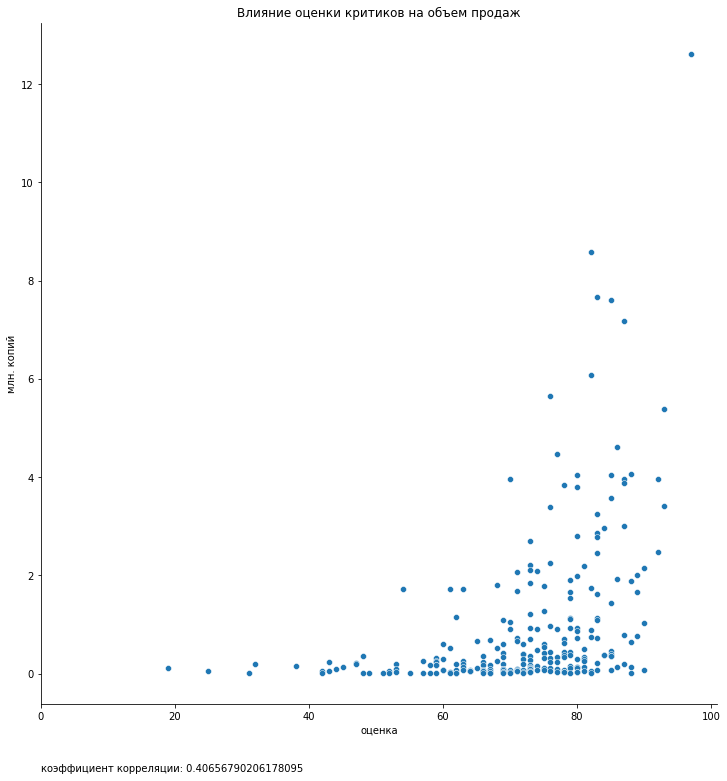

In [61]:
ps4 = stat_data_last[(stat_data_last['platform'] == 'PS4') & (stat_data_last['critic_score'] > 0)]
ps4_corr_critic = ps4['critic_score'].corr(ps4['total_sales'])

sns.relplot(data=ps4, 
            x='critic_score', 
            y='total_sales',
            height=10)
plt.title('Влияние оценки критиков на объем продаж')
plt.xlabel('оценка')
plt.ylabel('млн. копий')
plt.xlim(0,)
plt.text(0, -2, f'коэффициент корреляции: {ps4_corr_critic}')
plt.show()

Зависимости между оценками пользователей и продажами не наблюдается, есть небольшая прямая зависимоть от оценки критиков.

### Сравнение с другими платформами

In [62]:
actual_top_10

['X360', 'PS3', 'Wii', 'DS', 'PS2', 'PS4', 'PSP', '3DS', 'PC', 'XOne']

**X360**

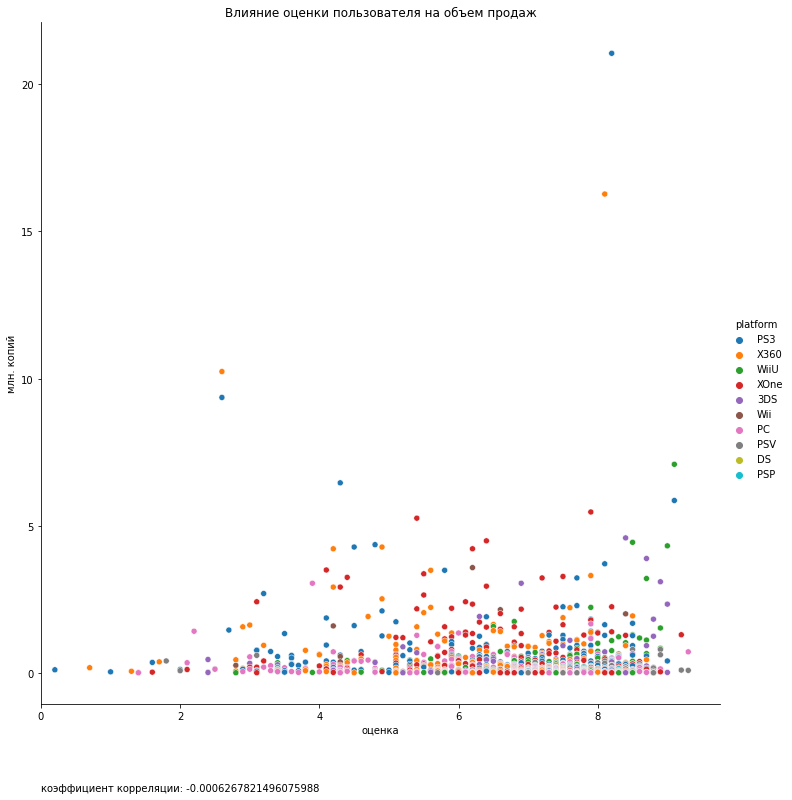

In [63]:
left = stat_data_last[(stat_data_last['platform'] != 'PS4') & (stat_data_last['user_score'] > 0)]
left_corr_user = left['user_score'].corr(left['total_sales'])

sns.relplot(data=left, 
            x='user_score', 
            y='total_sales',
            hue='platform',
            height=10)
plt.title('Влияние оценки пользователя на объем продаж')
plt.xlabel('оценка')
plt.ylabel('млн. копий')
plt.xlim(0,)
plt.text(0, -4, f'коэффициент корреляции: {left_corr_user}')
plt.show()

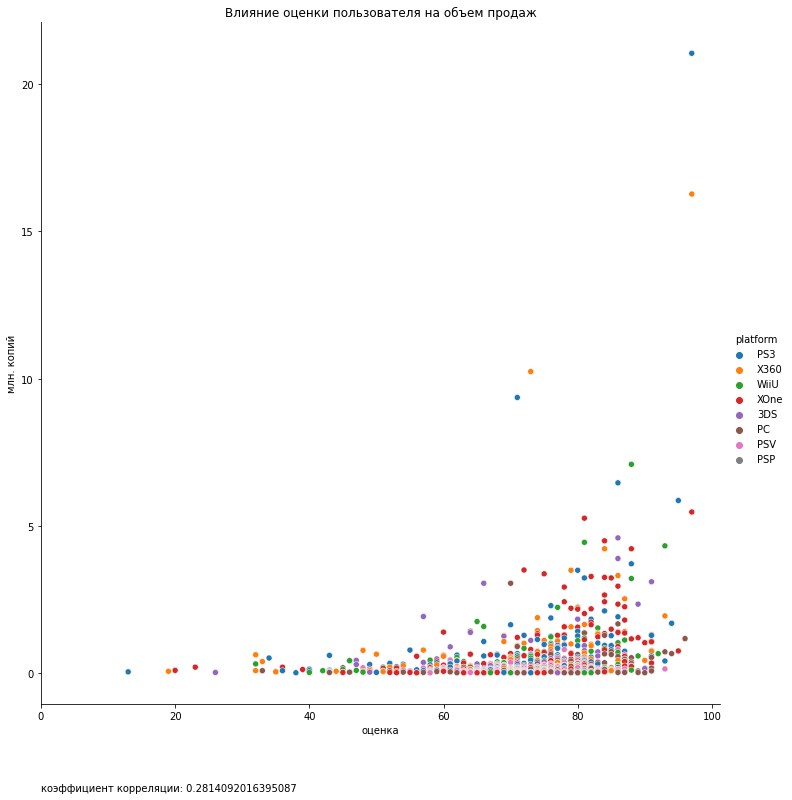

In [64]:
left = stat_data_last[(stat_data_last['platform'] != 'PS4') & (stat_data_last['critic_score'] > 0)]
left_corr_critic = left['critic_score'].corr(left['total_sales'])

sns.relplot(data=left, 
            x='critic_score', 
            y='total_sales',
            hue='platform',
            height=10)
plt.title('Влияние оценки пользователя на объем продаж')
plt.xlabel('оценка')
plt.ylabel('млн. копий')
plt.xlim(0,)
plt.text(0, -4, f'коэффициент корреляции: {left_corr_critic}')
plt.show()

У остальных платформ картина схожая - отсутствие зависимости продаж от оценок пользователей, небольшая прямая зависимость от оценки критиков у современных консолей.

### Распределение игр по жанрам

In [65]:
genre = stat_data_last.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count', 'mean'])

genre.columns = ['sum', 'count', 'average_sold']
genre.sort_values(by='sum', ascending=False)

,sum,count,average_sold
genre,,,
Action,322.27,767,0.420169
Shooter,233.05,188,1.239628
Sports,150.67,215,0.700791
Role-Playing,146.18,294,0.497211
Misc,62.82,155,0.405290
Platform,42.63,74,0.576081
Racing,39.98,86,0.464884
Fighting,35.31,80,0.441375
Adventure,23.73,246,0.096463


<AxesSubplot:title={'center':'Игры по жанрам.'}>

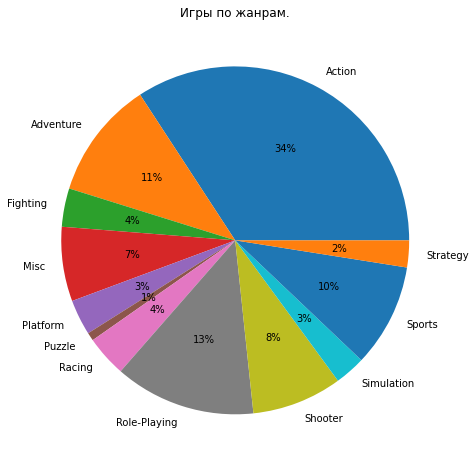

In [66]:
genre.plot(kind='pie',y="count", autopct='%1.0f%%', title = "Игры по жанрам.", legend=False, figsize=(8, 8), ylabel='')

Жанр Action - третья часть всех проданных игр, далее по порядку RPG, Adventure, Sports, Shooter. Так выглядит топ-5. Далее следует Misc(по сути игры для которых не смогли определить жанр)

Продажи по жанрам

<AxesSubplot:xlabel='genre'>

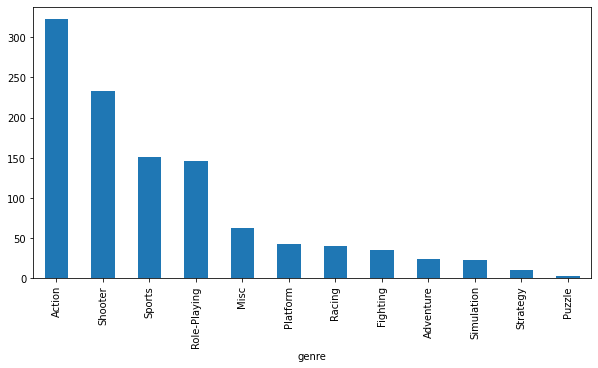

In [67]:
genre.sort_values(by='sum', ascending=False).plot(y='sum', kind='bar', figsize=(10, 5), legend=False)

А вот покупают игры жанра Advent не очень охотно, жанр не популярен. Остальные представители топ-5 на месте, хоть и с небольшой перестановкой. Shooter на втором месте по количеству проданных копий, Sports и RPG  практически на равных.

<AxesSubplot:xlabel='genre'>

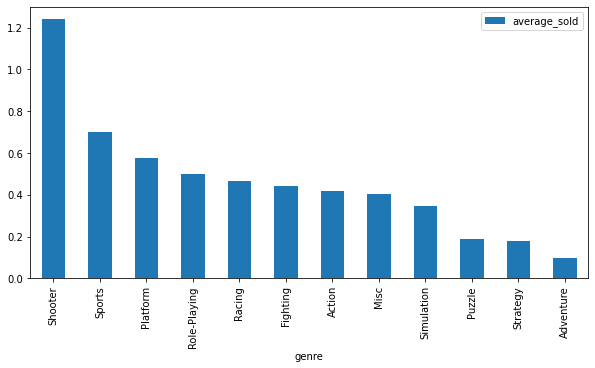

In [68]:
genre.sort_values(by='average_sold', ascending=False).plot(y='average_sold', kind='bar', figsize=(10, 5))

А вот по ксреднему количеству продаж на 1 игру Shooter уже безусловный лидер. На 2-м месте Sport, 3-е Platform. Топ-3 игры которых выпускают не так много - охотно раскупаются массовым пользователем, а вот игры Adventure пользуются спросом в онсновном у фанатов жанра.

## Составьте портрет пользователя каждого региона

### Топ-5 платформ

<AxesSubplot:title={'center':'USA'}>

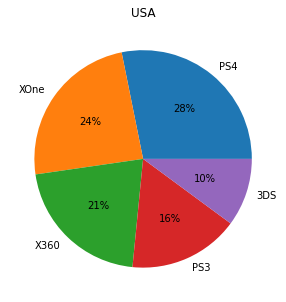

In [69]:
# графики строим по топ 5 актуальным плтформам по регионам
na_sales = stat_data_last.pivot_table(index='platform', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales') 
na_sales.plot(kind='pie',y="na_sales", autopct='%1.0f%%', legend=False, title = "USA", figsize=(5, 5), ylabel='')

Ранее лидером был Xbox, что ожидаемо, однако в последнем поколении консолей устепил свои позиции.

<AxesSubplot:title={'center':'Eorope'}>

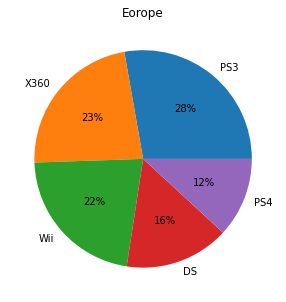

In [70]:
eu_sales = actual_platform_10.pivot_table(index='platform', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_sales.plot(kind='pie',y="eu_sales", autopct='%1.0f%%', legend=False, title = "Eorope", figsize=(5, 5), ylabel='')

В Европе больше уважают продукцию Sony.

<AxesSubplot:title={'center':'Japan'}>

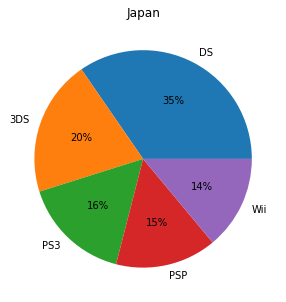

In [71]:
jp_sales = actual_platform_10.pivot_table(index='platform', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales') 
jp_sales.plot(kind='pie',y="jp_sales", autopct='%1.0f%%', legend=False, title = "Japan", figsize=(5, 5), ylabel='')

В японии большей популярностью пользуются портативные устройства.

<AxesSubplot:title={'center':'Other'}>

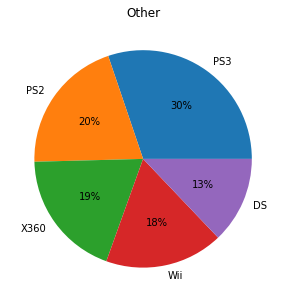

In [72]:
other_sales = actual_platform_10.pivot_table(index='platform', values='other_sales', aggfunc='sum').nlargest(5, 'other_sales')  
other_sales.plot(kind='pie',y="other_sales", autopct='%1.0f%%', legend=False, title = "Other", figsize=(5, 5), ylabel='')

В остальных странах соперничают PS лидирует.

Во всем мире до сих пор актуальна и пользуется популярностью Nintendo DS.

### Топ-5 Жанров

<AxesSubplot:title={'center':'USA'}>

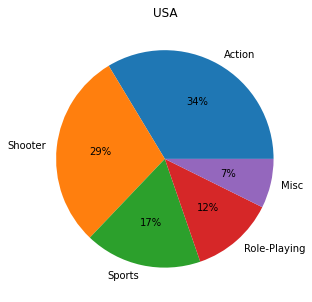

In [73]:
na_genre = stat_data_last.pivot_table(index='genre', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales') 
na_genre.plot(kind='pie',y="na_sales", autopct='%1.0f%%', legend=False, title = "USA", figsize=(5, 5), ylabel='')

<AxesSubplot:title={'center':'Eorope'}>

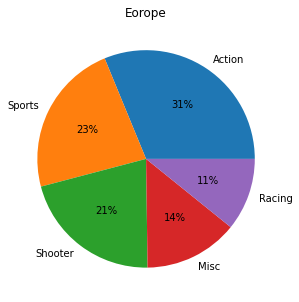

In [74]:
eu_genre = actual_platform_10.pivot_table(index='genre', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_genre.plot(kind='pie',y="eu_sales", autopct='%1.0f%%', legend=False, title = "Eorope", figsize=(5, 5), ylabel='')

<AxesSubplot:title={'center':'Japan'}>

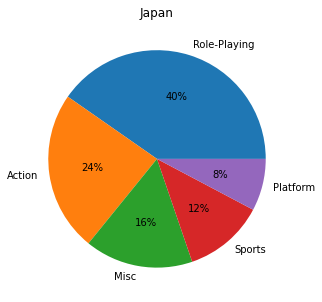

In [75]:
jp_genre = actual_platform_10.pivot_table(index='genre', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales') 
jp_genre.plot(kind='pie',y="jp_sales", autopct='%1.0f%%', legend=False, title = "Japan", figsize=(5, 5), ylabel='')

<AxesSubplot:title={'center':'Other'}>

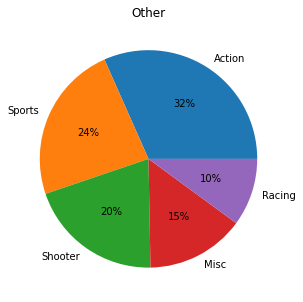

In [76]:
other_genre = actual_platform_10.pivot_table(index='genre', values='other_sales', aggfunc='sum').nlargest(5, 'other_sales')  
other_genre.plot(kind='pie',y="other_sales", autopct='%1.0f%%', legend=False, title = "Other", figsize=(5, 5), ylabel='')

Action игры самые популярные, второе и третье место делят Shooter и Sport в америке больше любят пострелять, в остальном мире больше предпочитают спортивные симуляторы. В Европе не любят РПГ. Особо выделяется Япония, там на первом месте RPG и совсем не популярны Shooter'ы.

### Влияние рейтинга ESRB на продажи

<AxesSubplot:title={'center':'USA'}>

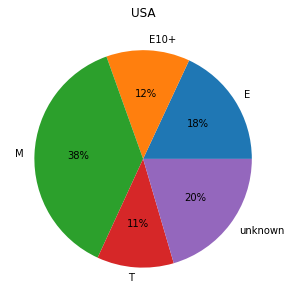

In [77]:
na_rating = stat_data_last.pivot_table(index='rating', values='na_sales', aggfunc='sum')
na_rating.plot(kind='pie',y="na_sales", autopct='%1.0f%%', legend=False, title = "USA", figsize=(5, 5), ylabel='')

<AxesSubplot:title={'center':'Europe'}>

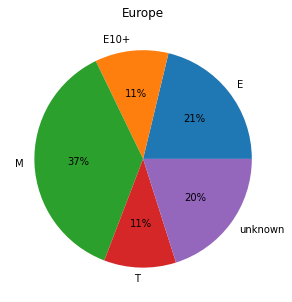

In [78]:
eu_rating = stat_data_last.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
eu_rating.plot(kind='pie',y="eu_sales", autopct='%1.0f%%', legend=False, title = "Europe", figsize=(5, 5), ylabel='')

<AxesSubplot:title={'center':'Japan'}>

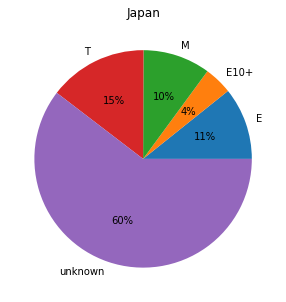

In [79]:
jp_rating = stat_data_last.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
jp_rating.plot(kind='pie',y="jp_sales", autopct='%1.0f%%', legend=False, title = "Japan", figsize=(5, 5), ylabel='')

<AxesSubplot:title={'center':'Europe'}>

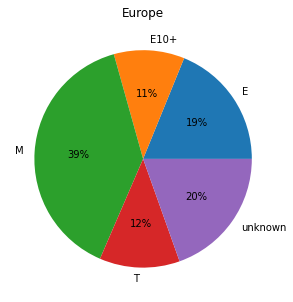

In [80]:
other_rating = stat_data_last.pivot_table(index='rating', values='other_sales', aggfunc='sum')
other_rating.plot(kind='pie',y="other_sales", autopct='%1.0f%%', legend=False, title = "Europe", figsize=(5, 5), ylabel='')

Наиболее популярны игры рейтинга M(17+) - самые яркие, захватывающие. На втором месте игры для всех, без каких либо ограничений (E), ну а затем уже игры для детей и подростков. 5я часть игр во всем мире не имеет рейтинга ESRB, а в Японии так и вовсе больше 60% игр не оценивались этой компанией. Возможно потому, что в японии любят игры типа графических новелл, которым не подходят стандарты оценки Американмкой компании, тем более у них есть свой аналог [CERO](https://ru.wikipedia.org/wiki/Computer_Entertainment_Rating_Organization).

## Проверка гипотез

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H₀ - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Исходя из H₀ можно сформулировать альтернативну гипотезу.      
H₁ - Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [81]:
xone = stat_data_last[(stat_data_last['platform'] == 'XOne') & (stat_data_last['user_score'] > 0)]['user_score']
pc = stat_data_last[(stat_data_last['platform'] == 'PC') & (stat_data_last['user_score'] > 0)]['user_score']

In [82]:
print(np.var(xone))
np.var(pc)

1.8965188383045526


3.016306347554631

In [83]:
results = st.ttest_ind(xone, pc, equal_var=False) # results = вызов метода для проверки гипотезы
alpha = 0.05 # значение уровня значимости

print('p-значение:', results.pvalue) # вывод значения p-value на экран

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") # условный оператор с выводом строки с ответом

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу. Популярными уровнями значимости являются 5%, 1% и 0.1%. Если в результате теста было получено p-значение меньше уровня значимости, то нулевая гипотеза отклоняется, а соответствующие результаты признаются статистически значимыми. С одной стороны, большой уровень значимости дает большую уверенность в истинности альтернативной гипотезы. Но при этом возрастает риск не отвергнуть ложную нулевую гипотезу (ошибка второго рода).

### Средние пользовательские рейтинги жанров Action и Sports разные
Нулевая гипотеза H₀ - средние пользовательские рейтинги жанров Action и Sports одинаковые.

H₁ - средние пользовательские рейтинги жанров Action и Sports различаются.

α=5% выше появляется больший шанс ошибочно отвергнуть гипотизу.

In [84]:
action = stat_data_last[(stat_data_last['genre'] == 'Action') & (stat_data_last['user_score'] > 0)]['user_score']
sports = stat_data_last[(stat_data_last['genre'] == 'Sports') & (stat_data_last['user_score'] > 0)]['user_score']

In [85]:
print(np.var(action))
np.var(sports)

1.7605786324786323


3.160733984375

In [86]:
results = st.ttest_ind(action, sports, equal_var=False) # results = вызов метода для проверки гипотезы
alpha = 0.05 # значение уровня значимости

print('p-значение:', results.pvalue) # вывод значения p-value на экран

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") # условный оператор с выводом строки с ответом

p-значение: 1.4711831608728666e-20
Отвергаем нулевую гипотезу


Принимаем альтернативнуую гипотезу H₁ - средние пользовательские рейтинги жанров Action и Sports различаются. Видимо любители этих жанров смотрят на игры по разному.

## Общий вывод

- Планируя кампанию на 2017-й год нужно сосредоточить внимание в первую очередь на современнных и актуальных платформах, как  PS4 и XBox One.
- Жанры Action или Shooter дадут наибольшей охват аудитории во всем мире, кроме Японии. Если вашей целью является это островное государство, то лучше ориентироваться на карманные консоли и и игры в жанре (RPG).
- Оценки пользователей продажи если  влияют, то в небольшой степени. В последнее время стало прояляться влияниекритиков, так что это нужно иметь в виду.
- Лучше всего продаются игры M(17+). Игры без рейтина ESRB  не приговор, могут хорошо продаваться, если это не явно детская игра, или специфического жанра для любителей. 

Рекомендации:
- Максимальным спросом пользуются игры с высоким возрастным рейтингом, жанра Action или Shooter выпущенные для современных платформ (для японии RPG и портативные платформы). Рекламные кампании следует планироватть в разрезе этих данных, т.е. было не очень удачной идеей рекламировть новую игру жанра Shooter для XBox One в в Японии, а вот провернуть такое в Штатах - звучит как хорошая идея.
- Не стоит тратить деньги на рекламу игр для неактуальных платформ, старше 11 лет с даты выхода на рынок.
- Статьи и высокие оценки критико далеко не гарантия высокого спроса на новые игры и покупать через них рекламу не очень ликвидное мероприятие. 

